In [ ]:
!uv pip install pandas numpy seaborn nbformat>=4.2.0 ipython plotly geopandas

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

import xarray as xr
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from matplotlib.ticker import FuncFormatter



# ============================================================================
# GLOBAL PLOT STYLING CONFIGURATION
# ============================================================================
# Define consistent color scheme
PLOT_COLORS = {
    "text_primary": "#111827",  # Dark gray for titles and primary text
    "text_secondary": "#374151",  # Medium gray for axis labels
    "text_tertiary": "#6b7280",  # Light gray for tick labels
    "grid": "#e5e7eb",  # Very light gray for grid lines
    "background": "white",  # White background
    "edge": "#e5e7eb",  # Edge color for legends/frames
    "bar_edge": "white",  # Edge color for bars
}

# Define consistent font settings
PLOT_FONTS = {
    "family": "DejaVu Sans",
    "size_base": 11,  # Base font size
    "size_title": 20,  # Title font size
    "size_label": 14,  # Axis label font size
    "size_tick": 12,  # Tick label font size
    "size_annotation": 12,  # Annotation/text font size
    "size_legend": 12,  # Legend font size
    "weight_title": "bold",  # Bold for titles (matplotlib string)
    "weight_label": "medium",  # Medium for labels (matplotlib string)
    "weight_tick": "normal",  # Normal for ticks (matplotlib string)
    "weight_annotation": "semibold",  # Semi-bold for annotations
    "weight_legend": "normal",  # Normal for legend
}

# Define consistent layout settings
PLOT_LAYOUT = {
    "figsize": (12, 8),  # Default figure size
    "dpi": 100,  # Resolution
    "pad": 2.0,  # Padding for tight_layout
    "left": 0.1,  # Left margin
    "right": 0.95,  # Right margin
    "top": 0.9,  # Top margin
    "bottom": 0.15,  # Bottom margin
    "labelpad": 15,  # Label padding
    "tick_pad": 8,  # Tick label padding
    "title_pad": 30,  # Title padding
}

# Define consistent line/edge settings
PLOT_LINES = {
    "grid_linewidth": 1.0,  # Grid line width
    "grid_alpha": 0.7,  # Grid line alpha
    "bar_edgewidth": 2.0,  # Bar edge line width
    "spine_linewidth": 0.0,  # Spine line width (hidden)
}

# Apply comprehensive global matplotlib settings
plt.rcParams.update(
    {
        # Font settings
        "font.family": PLOT_FONTS["family"],
        "font.size": PLOT_FONTS["size_base"],
        "font.weight": PLOT_FONTS["weight_tick"],
        # Figure settings
        "figure.dpi": PLOT_LAYOUT["dpi"],
        "figure.facecolor": PLOT_COLORS["background"],
        "figure.edgecolor": PLOT_COLORS["edge"],
        # Axes settings
        "axes.facecolor": PLOT_COLORS["background"],
        "axes.edgecolor": PLOT_COLORS["edge"],
        "axes.labelcolor": PLOT_COLORS["text_secondary"],
        "axes.labelweight": PLOT_FONTS["weight_label"],
        "axes.labelsize": PLOT_FONTS["size_label"],
        "axes.titlesize": PLOT_FONTS["size_title"],
        "axes.titleweight": PLOT_FONTS["weight_title"],
        "axes.titlecolor": PLOT_COLORS["text_primary"],
        "axes.titlepad": PLOT_LAYOUT["title_pad"],
        "axes.labelpad": PLOT_LAYOUT["labelpad"],
        # Spines settings
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
        # Note: spine linewidth must be set per-spine, not via rcParams
        # Tick settings - use text_secondary for all tick labels for consistency
        "xtick.color": PLOT_COLORS["text_secondary"],
        "ytick.color": PLOT_COLORS[
            "text_secondary"
        ],  # Changed from text_tertiary for consistency
        "xtick.labelsize": PLOT_FONTS["size_tick"],
        "ytick.labelsize": PLOT_FONTS["size_tick"],
        "xtick.labelcolor": PLOT_COLORS["text_secondary"],
        "ytick.labelcolor": PLOT_COLORS[
            "text_secondary"
        ],  # Changed from text_tertiary for consistency
        "xtick.major.pad": PLOT_LAYOUT["tick_pad"],
        "ytick.major.pad": PLOT_LAYOUT["tick_pad"],
        # Grid settings
        "grid.color": PLOT_COLORS["grid"],
        "grid.alpha": PLOT_LINES["grid_alpha"],
        "grid.linewidth": PLOT_LINES["grid_linewidth"],
        "grid.linestyle": "-",
        "axes.grid": True,
        "axes.grid.axis": "y",
        "axes.axisbelow": True,
        # Legend settings
        "legend.fontsize": PLOT_FONTS["size_legend"],
        "legend.frameon": True,
        "legend.framealpha": 1.0,
        "legend.facecolor": PLOT_COLORS["background"],
        "legend.edgecolor": PLOT_COLORS["edge"],
        "legend.labelcolor": PLOT_COLORS["text_secondary"],
        # Text settings
        "text.color": PLOT_COLORS["text_primary"],
    }
)

# Set seaborn theme with consistent settings (aligned with matplotlib)
sns.set_theme(
    style="whitegrid",
    font=PLOT_FONTS["family"],
    font_scale=PLOT_FONTS["size_base"] / 10,  # Normalize font scale
    rc={
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": False,
        "axes.spines.bottom": False,
    },
)


def apply_consistent_style(
    ax, title=None, xlabel=None, ylabel=None, title_pad=None, show_grid=True
):
    """
    Apply consistent styling to a matplotlib axes object.
    This function complements the global rcParams settings.

    Parameters:
    -----------
    ax : matplotlib.axes.Axes
        The axes object to style
    title : str, optional
        Plot title
    xlabel : str, optional
        X-axis label
    ylabel : str, optional
        Y-axis label
    title_pad : float, optional
        Padding for title (defaults to PLOT_LAYOUT['title_pad'])
    show_grid : bool, optional
        Whether to show grid (default: True)
    """
    # Set title with consistent styling
    if title:
        ax.set_title(
            title,
            fontsize=PLOT_FONTS["size_title"],
            fontweight=PLOT_FONTS["weight_title"],
            color=PLOT_COLORS["text_primary"],
            pad=title_pad if title_pad is not None else PLOT_LAYOUT["title_pad"],
        )

    # Set labels with consistent styling
    if xlabel is not None:  # Allow empty string
        ax.set_xlabel(
            xlabel,
            fontsize=PLOT_FONTS["size_label"],
            fontweight=PLOT_FONTS["weight_label"],
            color=PLOT_COLORS["text_secondary"],
            labelpad=PLOT_LAYOUT["labelpad"],
        )

    if ylabel:
        ax.set_ylabel(
            ylabel,
            fontsize=PLOT_FONTS["size_label"],
            fontweight=PLOT_FONTS["weight_label"],
            color=PLOT_COLORS["text_secondary"],
            labelpad=PLOT_LAYOUT["labelpad"],
        )

    # Grid styling (consistent with rcParams)
    if show_grid:
        ax.grid(
            True,
            axis="y",
            color=PLOT_COLORS["grid"],
            linestyle="-",
            linewidth=PLOT_LINES["grid_linewidth"],
            alpha=PLOT_LINES["grid_alpha"],
        )
        ax.grid(False, axis="x")
    else:
        ax.grid(False)

    ax.set_axisbelow(True)

    # Ensure spines are hidden (consistent with rcParams)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_linewidth(PLOT_LINES["spine_linewidth"])

    # Tick styling (consistent with rcParams)
    # Ensure all tick labels use consistent colors
    ax.tick_params(
        axis="y",
        colors=PLOT_COLORS[
            "text_secondary"
        ],  # Changed to text_secondary for consistency
        labelcolor=PLOT_COLORS["text_secondary"],
        labelsize=PLOT_FONTS["size_tick"],
        pad=PLOT_LAYOUT["tick_pad"],
    )
    ax.tick_params(
        axis="x",
        colors=PLOT_COLORS["text_secondary"],
        labelcolor=PLOT_COLORS["text_secondary"],
        labelsize=PLOT_FONTS["size_tick"],
        pad=PLOT_LAYOUT["tick_pad"],
    )


def create_figure(figsize=None, **subplots_adjust_kwargs):
    """
    Create a figure with consistent layout settings.

    Parameters:
    -----------
    figsize : tuple, optional
        Figure size (defaults to PLOT_LAYOUT['figsize'])
    **subplots_adjust_kwargs : dict
        Additional arguments for fig.subplots_adjust()

    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    if figsize is None:
        figsize = PLOT_LAYOUT["figsize"]

    fig, ax = plt.subplots(figsize=figsize)

    # Apply default layout with option to override
    default_adjust = {
        "left": PLOT_LAYOUT["left"],
        "right": PLOT_LAYOUT["right"],
        "top": PLOT_LAYOUT["top"],
        "bottom": PLOT_LAYOUT["bottom"],
    }
    default_adjust.update(subplots_adjust_kwargs)
    fig.subplots_adjust(**default_adjust)

    return fig, ax


In [ ]:


# SWE-bench Verified Results
models = ['GPT-4o',  'OpenAI o3','GPT-5 (fast)', 'GPT-5']
scores = [30.8,  69.1, 52.8, 74.9]
thinking_models = [False, True, False, True]  # True for thinking models, False for non-thinking

# Create DataFrame
df = pd.DataFrame({
    'Model': models,
    'Score': scores,
    'Thinking': thinking_models
})

# Set modern color palette - light pink for non-thinking, dark pink for thinking
colors = ['#FFB6C1' if not thinking else '#FF1493' for thinking in thinking_models]

# Create figure with consistent styling
plt.style.use('default')
fig, ax = plt.subplots(figsize=PLOT_LAYOUT['figsize'])
fig.subplots_adjust(
    left=PLOT_LAYOUT['left'],
    right=PLOT_LAYOUT['right'],
    top=PLOT_LAYOUT['top'],
    bottom=PLOT_LAYOUT['bottom']
)

# Create modern bar plot with overlapping bars - draw bar 4 first, then bar 3 over it
bar_width = 0.6
x_positions = [0, 1, 2,2]  # Position 3 and 4 overlap at 2.5

# Draw bars individually to control order - bar 4 first (GPT-5), then bar 3 (GPT-5 fast) on top
bars = []
for i in [0, 1, 3, 2]:  # Draw in order: GPT-4o, OpenAI o3, GPT-5, then GPT-5 (fast) on top
    bar = ax.bar(x_positions[i], scores[i], width=bar_width, color=colors[i], 
                 edgecolor=PLOT_COLORS['bar_edge'], linewidth=PLOT_LINES['bar_edgewidth'])
    bars.append(bar)

# Add value labels on top of bars with consistent spacing
for i, (pos, score) in enumerate(zip(x_positions, scores)):
    ax.text(pos, score + 2, f'{score}%', ha='center', va='bottom', 
            fontsize=PLOT_FONTS['size_annotation'], 
            fontweight=PLOT_FONTS['weight_annotation'], 
            color=PLOT_COLORS['text_primary'])

# Apply consistent styling using helper function
apply_consistent_style(
    ax,
    # title='SWE-bench Verified: AI Model Performance',
    # ylabel='Accuracy (%)',
    xlabel=''
)

# Set custom x-tick labels and positions with consistent styling
ax.set_xticks(x_positions)
ax.set_xticklabels(models, rotation=0, 
                   color=PLOT_COLORS['text_secondary'],
                   fontsize=PLOT_FONTS['size_tick'])

# Add legend with consistent styling
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#FFB6C1', label='Without thinking'),
    Patch(facecolor='#FF1493', label='With thinking')
]
legend = ax.legend(
    handles=legend_elements,
    loc='upper left',
    ncol=1,
    bbox_to_anchor=(0.03, 0.97),
    fontsize=PLOT_FONTS['size_legend'],
    labelcolor=PLOT_COLORS['text_secondary']  # Explicitly set legend text color
)
# Ensure legend text uses consistent color
for text in legend.get_texts():
    text.set_color(PLOT_COLORS['text_secondary'])

# Set y-axis range and ticks
ax.set_ylim(0, 85)
ax.set_yticks([])

plt.tight_layout(pad=PLOT_LAYOUT['pad'])


os.makedirs('./out', exist_ok=True)

# Save to PDF using PdfPages for lossless, non-rasterized quality
pdf_path = './out/2_swe_bench_verified_performance.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

print(f"Saved lossless vector PDF: {pdf_path}")

plt.show()


In [ ]:
# https://data.giss.nasa.gov/gistemp/

temp_df = pd.read_csv("datasets/nasaGis.csv", skiprows=1)

temp_df.columns

# Drop seasonal columns
temp_df = temp_df.drop(columns=["J-D", "D-N", "DJF", "MAM", "JJA", "SON"])

temp_df.head()

# Calculate annual average temperature anomaly from monthly data
monthly_cols = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
# Convert monthly columns to numeric, handling non-numeric values (like "***") as NaN
for col in monthly_cols:
    temp_df[col] = pd.to_numeric(temp_df[col], errors="coerce")
# Calculate mean, ignoring NaN values
temp_df["Annual_Avg"] = temp_df[monthly_cols].mean(axis=1, skipna=True)

# Filter out rows with incomplete data (like 2025) and NaN values
temp_df = temp_df[(temp_df["Year"] <= 2024) & (temp_df["Annual_Avg"].notna())].copy()

# Create climate change visualization
fig, ax = create_figure(figsize=(14, 8))

# Plot temperature anomaly over time
years = temp_df["Year"].values
temps = temp_df["Annual_Avg"].values

# Create color gradient based on temperature (cooler = blue, warmer = red)
colors = plt.cm.RdYlBu_r((temps - temps.min()) / (temps.max() - temps.min()))

# Plot line with color gradient
for i in range(len(years) - 1):
    ax.plot(
        [years[i], years[i + 1]],
        [temps[i], temps[i + 1]],
        color=colors[i],
        linewidth=2.5,
        alpha=0.8,
    )

# Add scatter points for emphasis
scatter = ax.scatter(
    years,
    temps,
    c=temps,
    cmap="RdYlBu_r",
    s=30,
    alpha=0.7,
    edgecolors="black",
    linewidths=0.5,
    zorder=5,
)

# Add trend line using numpy polyfit
z = np.polyfit(years, temps, 1)
p = np.poly1d(z)
trend_line = ax.plot(
    years,
    p(years),
    "--",
    color=PLOT_COLORS["text_primary"],
    linewidth=2,
    alpha=0.6,
    label=f"Trend: +{z[0]:.3f}°C/year",
    zorder=4,
)

# # Highlight recent warming period (2000-2024)
# recent_mask = (years >= 2000) & (years <= 2024)
# ax.fill_between(years[recent_mask], temps[recent_mask],
#                 alpha=0.15, color='#FF1493', zorder=1, label='Recent warming (2000-2024)')

warming_mask = temps > 0
ax.fill_between(
    years,
    temps,
    where=warming_mask,
    alpha=0.15,
    color="#FF1493",
    interpolate=True,
    label="Above Average",
)

# Add reference line at 0°C anomaly
ax.axhline(
    y=0,
    color=PLOT_COLORS["text_secondary"],
    linestyle=":",
    linewidth=1.5,
    alpha=0.5,
    zorder=2,
)

# # Add annotations for key milestones
# # Find warmest year
# warmest_idx = np.argmax(temps)
# warmest_year = years[warmest_idx]
# warmest_temp = temps[warmest_idx]
# ax.annotate(f'Warmest: {warmest_year}\n({warmest_temp:.2f}°C)',
#             xy=(warmest_year, warmest_temp),
#             xytext=(warmest_year + 5, warmest_temp + 0.15),
#             fontsize=PLOT_FONTS['size_annotation'],
#             color=PLOT_COLORS['text_primary'],
#             fontweight=PLOT_FONTS['weight_annotation'],
#             bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
#                      edgecolor=PLOT_COLORS['edge'], alpha=0.9),
#             arrowprops=dict(arrowstyle='->', color=PLOT_COLORS['text_primary'],
#                           lw=1.5))

# Apply consistent styling
apply_consistent_style(
    ax,
    # title="Global Temperature Anomaly Over Time (1880-2024)",
    # xlabel="Year",
    # ylabel="Temperature Anomaly (°C)",
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)

cbar.ax.tick_params(
    labelsize=PLOT_FONTS["size_tick"],
    color=PLOT_COLORS["text_secondary"],
    labelcolor=PLOT_COLORS["text_secondary"],
)

# Add legend
legend = ax.legend(
    loc="upper left",
    fontsize=PLOT_FONTS["size_legend"],
    framealpha=1.0,
    facecolor=PLOT_COLORS["background"],
    edgecolor=PLOT_COLORS["edge"],
)
for text in legend.get_texts():
    text.set_color(PLOT_COLORS["text_secondary"])

# Format x-axis to show decades
ax.set_xticks(range(1880, 2025, 20))
ax.set_xlim(1875, 2025)

# Add statistics text box
# recent_avg = temps[recent_mask].mean()
# early_avg = temps[years < 1950].mean()
# warming = recent_avg - early_avg

# stats_text = f'Recent Average (2000-2024): {recent_avg:.2f}°C\n'
# stats_text += f'Early Average (1880-1949): {early_avg:.2f}°C\n'
# stats_text += f'Total Warming: {warming:.2f}°C'

# ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
#         fontsize=PLOT_FONTS['size_annotation'],
#         color=PLOT_COLORS['text_secondary'],
#         verticalalignment='top',
#         bbox=dict(boxstyle='round,pad=0.8', facecolor='white',
#                  edgecolor=PLOT_COLORS['edge'], alpha=0.9))

plt.tight_layout(pad=PLOT_LAYOUT["pad"])

# Save to PDF
os.makedirs("./out", exist_ok=True)
pdf_path = "./out/4_climate_change_visualization.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

print(f"Saved climate change visualization to: {pdf_path}")

plt.show()


In [ ]:
# 5. Create a black-and-white visualization (no grey levels)
# Make a graph of apple revenue over time use datasets/comp_na_daily_all.csv

# Load the dataset
df = pd.read_csv("datasets/comp_na_daily_all.csv")

# Filter for Apple (AAPL) data
aapl_df = df[df['tic'] == 'AAPL'].copy()

# Convert datadate to datetime
aapl_df['datadate'] = pd.to_datetime(aapl_df['datadate'])

# Sort by date
aapl_df = aapl_df.sort_values('datadate')

# Use 'sale' column for revenue (or 'revt' if 'sale' is not available)
# Check which column exists
if 'sale' in aapl_df.columns:
    revenue_col = 'sale'
elif 'revt' in aapl_df.columns:
    revenue_col = 'revt'
else:
    # Try to find any revenue-related column
    revenue_col = [c for c in aapl_df.columns if 'rev' in c.lower() or 'sale' in c.lower()][0]

# Filter out rows with missing revenue data
aapl_df = aapl_df[aapl_df[revenue_col].notna()].copy()

# Convert revenue to numeric (in case it's stored as string)
aapl_df[revenue_col] = pd.to_numeric(aapl_df[revenue_col], errors='coerce')

# Remove any rows that couldn't be converted
aapl_df = aapl_df[aapl_df[revenue_col].notna()].copy()

# Create black-and-white visualization (pure black and white, no grey)
fig, ax = plt.subplots(figsize=(14, 8))

# Plot revenue over time - use pure black color
ax.plot(aapl_df['datadate'], aapl_df[revenue_col], 
        color='black', linewidth=2.5, marker='o', markersize=4, 
        markerfacecolor='black', markeredgecolor='black')

# Set title and labels - all in black
# ax.set_title('Apple Revenue Over Time', 
#              fontsize=PLOT_FONTS['size_title'],
#              fontweight=PLOT_FONTS['weight_title'],
#              color='black', pad=PLOT_LAYOUT['title_pad'])
# ax.set_xlabel('Year', fontsize=PLOT_FONTS['size_label'],
#               fontweight=PLOT_FONTS['weight_label'],
#               color='black', labelpad=PLOT_LAYOUT['labelpad'])
# ax.set_ylabel('Revenue (Millions USD)', fontsize=PLOT_FONTS['size_label'],
#               fontweight=PLOT_FONTS['weight_label'],
#               color='black', labelpad=PLOT_LAYOUT['labelpad'])

# Style the plot - pure black and white
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Grid lines in black (but thin to maintain black-and-white aesthetic)
ax.grid(True, color='black', linestyle='-', linewidth=0.5, alpha=1.0)

# Spines in black
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.5)

# Ticks and labels in black
ax.tick_params(axis='both', which='major', labelsize=PLOT_FONTS['size_tick'],
               color='black', labelcolor='black', width=1)

# Format y-axis to show values in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x/1000:.0f}B' if x >= 1000 else f'${x:.0f}M'))

# Rotate x-axis labels for better readability
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout(pad=PLOT_LAYOUT['pad'])

# Save to PDF
os.makedirs('./out', exist_ok=True)
pdf_path = './out/5_apple_revenue_black_and_white.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

print(f"Saved black-and-white Apple revenue visualization to: {pdf_path}")

plt.show()

In [ ]:

# Create a simple temperature over time visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot temperature anomalies
ax.plot(years, temps, color='black', linewidth=2)

# Set title and labels
ax.set_title('Global Temperature Anomalies (1880-2024)', 
             fontsize=16, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Year', fontsize=12, color='black')
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=12, color='black')

# Style the plot
ax.grid(True, alpha=0.3, color='black', linestyle='-', linewidth=0.5)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Style spines and ticks
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1)

ax.tick_params(axis='both', which='major', labelsize=10,
               color='black', labelcolor='black')

# Format x-axis to show decades
ax.set_xticks(range(1880, 2025, 20))
ax.set_xlim(1875, 2025)

plt.tight_layout(pad=1.5)

# Save to PDF
os.makedirs('./out', exist_ok=True)
pdf_path = './out/5_climate_simple_visualization.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

print(f"Saved simple climate visualization to: {pdf_path}")

plt.show()

In [ ]:
# https://data.giss.nasa.gov/gistemp/
# https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756/

xr_df = xr.open_dataset('datasets/gistemp250_GHCNv4.nc')
xr_df


#Downsample the time series to yearly frequency.
climate = xr_df.resample(time='Y').mean()
anomaly = climate['tempanomaly']

#Creating a static image of the global temperature anomaly for a given year.
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-150, 150, -55, 85])

i=-1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly in "+ str(date.year) + " [°C]")
anomaly.isel(time=i).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')
plt.savefig("global_map.png", bbox_inches='tight', dpi=150)
plt.show()



In [ ]:

# Load data
ibm_ohlc = pd.read_csv("datasets/crsp_ibm_ohlc.csv", parse_dates=["DlyCalDt"])
ibm_ohlc = (
    ibm_ohlc
    .set_index("DlyCalDt")
    .resample("M")
    .mean(numeric_only=True)
    .reset_index()
)


# Create figure with maximum plot area (minimize margins for data-ink ratio)
fig, ax = plt.subplots(figsize=(8, 5))
fig.subplots_adjust(left=0.12, right=0.98, top=0.98, bottom=0.12)

# Plot line - pure data ink only
# Use dark color for maximum contrast (data-ink)
ax.plot(ibm_ohlc["DlyCalDt"], ibm_ohlc["DlyClose"], 
        color='#111827', linewidth=1.5, alpha=0.8)


# Erase all non-data-ink: remove all spines/borders
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
    ax.spines[spine].set_linewidth(0)

# Remove grid lines (non-data-ink)
ax.grid(False)


ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Save to PDF
os.makedirs("./out", exist_ok=True)
pdf_path = "./out/7_dataink.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

plt.show()


In [ ]:
# Correlation Heatmap for IBM Financial Data

# Load data and filter for IBM
data = pd.read_csv("datasets/compustat_IBM_APPL_2010_2025.csv")
ibm_data = data[data['tic'] == 'IBM'].copy()

# Select key financial numeric columns for correlation analysis
financial_cols = [
    'sale',      # Sales/Revenue
    'cogs',      # Cost of Goods Sold
    'xsga',      # Selling, General & Administrative Expenses
    'ni',        # Net Income
    'at',        # Total Assets
    'lt',        # Total Liabilities
    'ceq',       # Common Equity
    'revt',      # Total Revenue
    'ebit',      # Earnings Before Interest and Taxes
    'ebitda',    # EBITDA
    'oancf',     # Operating Activities Net Cash Flow
    'capx',      # Capital Expenditures
    'xrd',       # Research and Development Expenses
    'emp',       # Employees
]

# Create mapping from variable names to proper labels
variable_labels = {
    'sale': 'Sales',
    'cogs': 'Cost of Goods Sold',
    'xsga': 'SG&A Expenses',
    'ni': 'Net Income',
    'at': 'Total Assets',
    'lt': 'Total Liabilities',
    'ceq': 'Common Equity',
    'revt': 'Total Revenue',
    'ebit': 'EBIT',
    'ebitda': 'EBITDA',
    'oancf': 'Operating Cash Flow',
    'capx': 'Capital Expenditures',
    'xrd': 'R&D Expenses',
    'emp': 'Employees',
}

# Filter to only include columns that exist in the dataset
available_cols = [col for col in financial_cols if col in ibm_data.columns]

# Select numeric columns and calculate correlation
ibm_numeric = ibm_data[available_cols].select_dtypes(include=[np.number])
corr_matrix = ibm_numeric.corr()

# Create mask for upper triangle (show only half of the symmetric matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Find top 5 correlations (excluding diagonal and duplicates)
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.iloc[i, j]
        corr_pairs.append((col1, col2, corr_value))



# Create figure with consistent styling (adjusted for text at bottom)
fig, ax = create_figure(figsize=(14, 12))

# Create heatmap using seaborn with mask to show only upper triangle
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm_r',  # Red to green colormap (red for -1, green for +1)
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    linecolor=PLOT_COLORS["edge"],
    cbar_kws={
        'label': '',
        'shrink': 1.0,  # Make colorbar same height as graph
        'aspect': 20,   # Control colorbar width
    },
    ax=ax
)

# Apply consistent styling
apply_consistent_style(
    ax,
    # title="IBM Financial Metrics Correlation Heatmap",
    xlabel="",  # Remove x-axis label
    ylabel="",  # Remove y-axis label
    show_grid=False
)

# Map variable names to proper labels for tick labels
tick_labels = [variable_labels.get(col, col) for col in corr_matrix.columns]
ax.set_xticklabels(tick_labels, rotation=45, ha='right')
ax.set_yticklabels(tick_labels, rotation=0)



plt.tight_layout(pad=PLOT_LAYOUT["pad"])

# Save to PDF
os.makedirs("./out", exist_ok=True)
pdf_path = "./out/8_ibm_correlation_heatmap.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

print(f"Saved IBM correlation heatmap to: {pdf_path}")

plt.show()


Loaded map data with 258 countries
Available columns: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN']...
European average unemployment rate: 5.30%
European min: 2.39%, European max: 11.36%


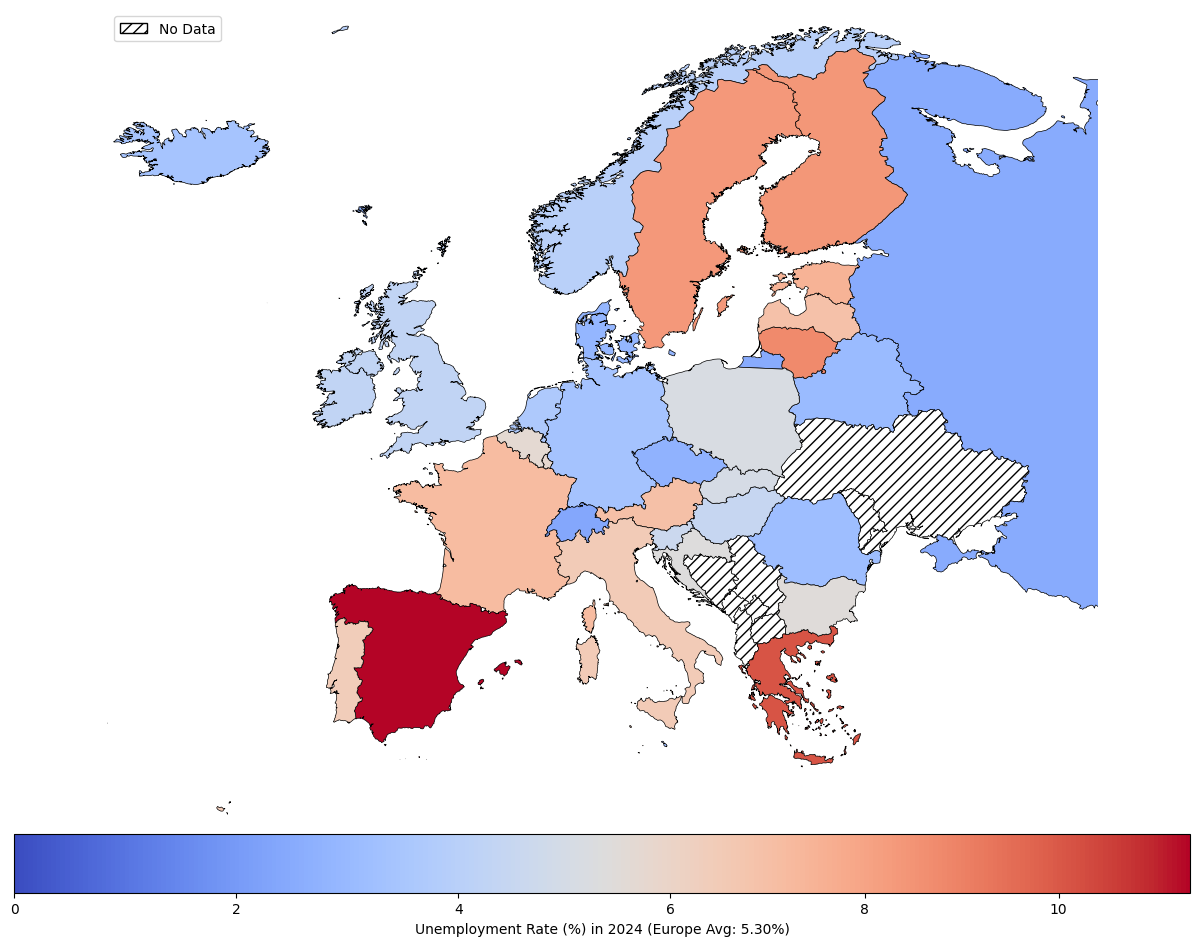

In [99]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the Data
# Ensure the CSV file is in the same directory or provide the full path
filename = "datasets/GemDataEXTR/Unemployment Rate, seas. adj..csv"
df = pd.read_csv(filename, sep=";", header=0)

# 2. Data Cleaning
# Rename the first column to 'Year' if it was unnamed
df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

# Remove the empty first row (if present) and convert Year to integer
df = df.drop(0)
df['Year'] = df['Year'].astype(int)

# Melt the dataframe to long format (Year, Country, Unemployment)
df_melted = df.melt(id_vars=['Year'], var_name='Country', value_name='Unemployment')

# Convert Unemployment rate to numeric 
# (handling European decimal format replacing ',' with '.')
df_melted['Unemployment'] = df_melted['Unemployment'].astype(str).str.replace(',', '.').apply(pd.to_numeric, errors='coerce')

# Filter for the year 2024 (selected for best recent data availability)
target_year = 2024
df_target = df_melted[df_melted['Year'] == target_year].copy()

# 3. Load Map Data
# Load the Natural Earth dataset from zip file (following example from solution notebook)
map_file = 'ne_10m_admin_0_countries.zip'
if not os.path.exists(map_file):
    print("Map file not found. Please ensure ne_10m_admin_0_countries.zip is in the current directory.")
    print("Download from: https://www.naturalearthdata.com/downloads/")
else:
    world = gpd.read_file(map_file)
    print(f"Loaded map data with {len(world)} countries")
    print(f"Available columns: {list(world.columns)[:10]}...")

# 4. Prepare Map Data
# Filter for Europe only (excluding Turkey)
# Use 'CONTINENT' (uppercase) and 'SOVEREIGNT' columns as in the solution notebook
europe_map = world[(world['CONTINENT'] == 'Europe') & 
                   (world['SOVEREIGNT'] != 'Turkey')].copy()

# Manual mapping to match CSV names to Map SOVEREIGNT names
# Based on the actual column names in the Natural Earth data
name_mapping = {
    'Russian Federation': 'Russia',
    'Czech Republic': 'Czechia',  # Map uses 'Czechia'
    'North Macedonia': 'Macedonia',  # Map uses 'Macedonia'
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',  # Check actual name in map
    'Slovak Republic': 'Slovakia',
    'United Kingdom': 'United Kingdom',  # Keep as is
    # Add more mappings as needed based on actual SOVEREIGNT values
}

df_target['Country_Map'] = df_target['Country'].replace(name_mapping)

# 5. Merge Data
# Left join on map data to ensure the map shape exists even if data is missing
# Use 'SOVEREIGNT' column for matching (as in solution notebook)
# Note: europe_map already excludes Turkey
merged = europe_map.merge(df_target, left_on='SOVEREIGNT', right_on='Country_Map', how='left')

# 6. Calculate European Average (excluding Turkey)
# Calculate European statistics from merged data (already excludes Turkey from europe_map)
europe_data = merged['Unemployment'].dropna()

# Calculate European average, min, and max
europe_avg = europe_data.mean()
europe_min = europe_data.min()
europe_max = europe_data.max()

print(f"European average unemployment rate: {europe_avg:.2f}%")
print(f"European min: {europe_min:.2f}%, European max: {europe_max:.2f}%")

# Calculate symmetric range around European average for diverging colormap
# Use European min and max to set the range
# Ensure vmin is never below 0 (unemployment rates cannot be negative)
max_deviation = max(
    abs(europe_max - europe_avg),
    abs(europe_min - europe_avg)
)
vmin = max(0, europe_avg - max_deviation)  # Clamp to 0 minimum
vmax = europe_avg + max_deviation

# 7. Plotting with coolwarm colormap centered at European average
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create normalization centered at European average
# This ensures white is at the European average
norm = TwoSlopeNorm(vmin=vmin, vcenter=europe_avg, vmax=vmax)

# Use coolwarm colormap with center at European average
# Blue = below European average, White = European average, Red = above European average

# Separate countries with data from those without data
merged_with_data = merged[merged['Unemployment'].notna()].copy()
merged_no_data = merged[merged['Unemployment'].isna()].copy()

# Plot countries with data first
merged_with_data.plot(column='Unemployment', 
                      ax=ax, 
                      legend=True,
                      legend_kwds={'label': f"Unemployment Rate (%) in {target_year} (Europe Avg: {europe_avg:.2f}%)", 
                                   'orientation': "horizontal", 
                                   'shrink': 0.8,
                                   'pad': 0.01,  # Reduce padding between map and colorbar
                                   'aspect': 20},  # Control colorbar width
                      cmap='coolwarm',  # Diverging colormap: blue-white-red
                      norm=norm,  # Use TwoSlopeNorm to center at European average
                      edgecolor='black', 
                      linewidth=0.5)

# Plot countries with no data separately with diagonal hatching
if len(merged_no_data) > 0:
    from matplotlib.patches import Patch
    
    # Track number of collections before plotting no-data countries
    collections_before = len(ax.collections)
    
    # Plot no-data countries with light grey
    merged_no_data.plot(ax=ax,
                       color='lightgrey',
                       edgecolor='black',
                       linewidth=0.5,
                       zorder=0)
    
    # Apply diagonal hatching to the newly added collection(s)
    # The no-data countries are the collections added after we started tracking
    for i, collection in enumerate(ax.collections):
        if i >= collections_before:
            # This is a no-data country collection - add hatching
            collection.set_hatch('///')  # Diagonal lines pattern
            collection.set_facecolor('white')
            collection.set_edgecolor('black')
    
    # Add legend entry for no data
    no_data_patch = Patch(facecolor='white', 
                         edgecolor='black', 
                         hatch='///', 
                         label='No Data')
    # Update legend to include no-data patch
    handles, labels = ax.get_legend_handles_labels()
    # Remove duplicate entries and add no-data
    if 'No Data' not in labels:
        handles.append(no_data_patch)
        labels.append('No Data')
        ax.legend(handles=handles, labels=labels, loc='upper left')

# Zoom in on Europe coordinates
ax.set_xlim(-25, 45)
ax.set_ylim(32, 72)

# ax.set_title(f'Unemployment Rate in Europe ({target_year})', fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('europe_unemployment_map.png', dpi=300)
plt.show()

os.makedirs("./out", exist_ok=True)
pdf_path = "./out/10_europe_unemployment_map.pdf"
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig, bbox_inches="tight")


